# Filtro de Mediana y detección de bordes

En primer lugar, se importan las librerías necesarias para la realización del ejecicio:
1. numpy: Necesaria para las operacionaes matemáticas
2. matplotlib: Necesaira para mostar las imagenes
3. skimage: Librería que permite aplicar funciones a imágenes

In [30]:
from skimage import data, color
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.filters import median
from skimage import feature
import numpy as np


import warnings
warnings.filterwarnings('ignore') # Se eliminan los warnings que aparecen por convergencia para una mejor presentación

## Función de ruido S&P

En el siguiente apartado se realizará una función que permita la adición, de forma aleatoria, de artefactos impulsivos.  
Para ello se generán dos funciones:
1. add_salt_pepper_noise: Se realizará mediante la librería de skimage
2. add_salt_pepper_noise2: Se realizará mediante funciones numpy

### Mediante Skimage

En este caso, se hace uso del método *random_noise* que proporciona la librería de skimage.  
Este método permite agregar el tipo de ruido a generar, eligiendo s&p y pudiendo pasarle el amount (tanto por uno correspondiente al ruido añadido respecto al total de la imagen)

In [31]:
def add_salt_pepper_noise(image, amount):
    """
    Método que a partir de una imagen y una cantidad (opcional de 0 a 1)
    devuelve una imagen con un ruido de sal y pimienta
    Return: image
    """
    return random_noise(image, mode = 's&p', amount=amount)

### Mediante el uso de Numpy

Mediante numpy se debe realizar de forma manual la generación de este ruido.  
Para dotar al método de mayor flexibilidad, además de los parámetros anteriores, se incluirá otro parámetro que es el s_vs_p, que permitirá decir que porcentaje se quiere de sal con respcto a pimienta.  
  
Para la agregación de este ruido se realizan los siguientes cálculos:
1. Cálculo del número de pixeles de sal/pimienta: PAra ello, se multiplica el porcentaje (amount) por el número total de píxeles y por el porcentaje sal/pimienta.
2. De forma aleatoria se seleccionan los índices de cada fila de la imagen
3. A los indices seleccionados, se les aplica el ruido establecido (1 para Sal y 0 para pimienta).
4. Se devuelve la imagen

In [32]:
def add_salt_pepper_noise2(image, amount=0.5, s_vs_p = 0.5):
    """
    Método que a partir de una imagen, una cantidad (opcional de 0 a 1) y un
    valor que parametriza la cantidad de sal y la de pimienta (de 0 a 1),
    devuelve una imagen con un ruido de sal y pimienta
    Return: image
    """
    row,col = image.shape
    out = np.copy(image)
    
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in image.shape]
    out[coords] = 1
     # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
        for i in image.shape]
    out[coords] = 0
    return out

## Filtrado de Mediana

Al igual que para la agregación de ruido S&P, en este caso se generan dos funciones:
1. filter_median: Donde se hace uso de skimage
2. filter_median2: Donde se hace uso de numpy

### Mediante Skimage

En este caso, se hace uso del método *median* que proporciona la librería de skimage.  
Este método permite aplicar un filtrado de mediana a una imagen de forma automática

In [33]:
def filter_median(image):
    return median(image_noisy)

### Mediante Numpy

En este caso, para darle más flexibilidad, se utiliza un parámetro (n) que permitirá decidir el número de bloques al que se quiere aplciar el filtrado de mediana.  
A continuación, se recorre la imagen y se aplica la mediana para el bloque del pixel en función del parámetro n

In [34]:
def filter_median2(image, n=3):
    """
    Método que permite a partir de una imagen y de un numero de bloque(opcional)
    se realiza un filtro de mediana
    Return: image
    """
    n_rows, n_columns = image.shape
    image_copy = np.copy(image)
    for i in range(n_rows):
        for j in range(n_columns):
            image_copy[i, j] = np.median(image[i-int((n/2)):i+int((n/2)), j-int((n/2)):j+int((n/2))])
    return image_copy

## Resultados

A continuación, se exponen los resultados de aplicar el ruido S&P a la imagen utilizando las dos funciones creadas anteriormente

Text(0.5, 1.0, 'Using Numpy')

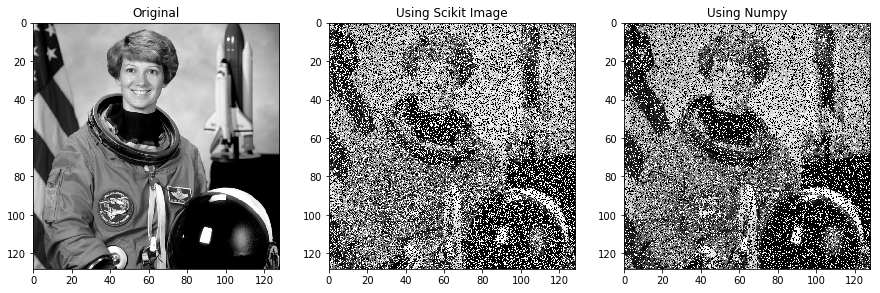

In [35]:
image = color.rgb2gray(data.astronaut())

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey = False, figsize=(15,5))

ax1.imshow(image, extent=(0, 128, 128, 0), interpolation='nearest',
             cmap="gray")
ax2.imshow(add_salt_pepper_noise(image, 0.5), extent=(0, 128, 128, 0), interpolation='nearest',
             cmap="gray")
ax3.imshow(add_salt_pepper_noise2(image, 0.5), extent=(0, 128, 128, 0), interpolation='nearest',
             cmap="gray")
ax1.set_title("Original")
ax2.set_title("Using Scikit Image")
ax3.set_title("Using Numpy")

Por último, utilizando la imagen con ruido generada por skimage, se exponen los resultados de aplicar el filtrado de mediana a la imagen utilizando las dos funciones creadas anteriormente

Text(0.5, 1.0, 'Using Numpy')

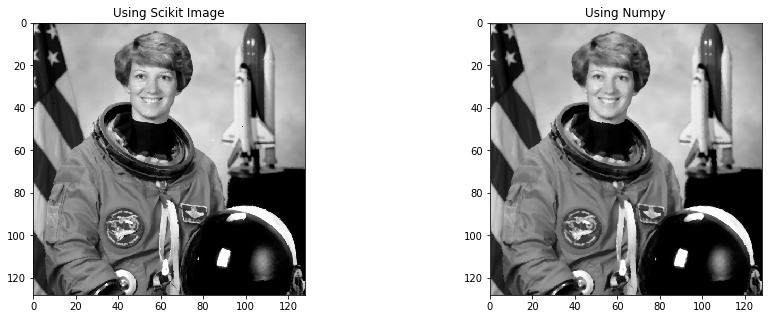

In [36]:
image_noisy = add_salt_pepper_noise(image, 0.1)


f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey = False, figsize=(15,5))

ax1.imshow(filter_median(image_noisy), extent=(0, 128, 128, 0), interpolation='nearest',
           cmap="gray")
ax2.imshow(filter_median2(image_noisy, n=5), extent=(0, 128, 128, 0), interpolation='nearest',
             cmap="gray")
ax1.set_title("Using Scikit Image")
ax2.set_title("Using Numpy")

## Detector de siluets (edge detection)

Para la detección de siluetas, se hará uso de las funciones provistas por las librerías de skimage.  
  
A continuación se pueden ver los resultados de aplicar los siguientes filtros:
1. roberts
2. sobel
3. canny
4. prewitt

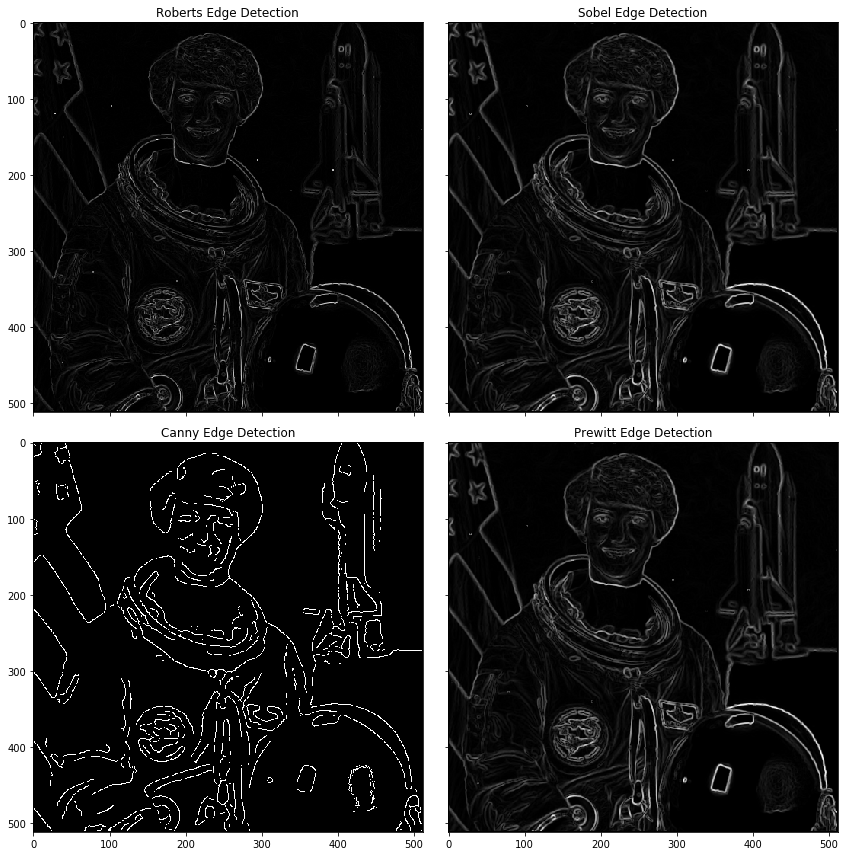

In [37]:
from skimage.filters import roberts, sobel, prewitt

image_filtered = median(image_noisy)
edge_roberts = roberts(image_filtered)
edge_sobel = sobel(image_filtered)
edge_prewitt = prewitt(image_filtered)
edges_canny = feature.canny(image_filtered, sigma=3)


fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True,
                       figsize=(12, 12))

ax[0][0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0][0].set_title('Roberts Edge Detection')

ax[0][1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[0][1].set_title('Sobel Edge Detection')

ax[1][0].imshow(edges_canny, cmap=plt.cm.gray)
ax[1][0].set_title('Canny Edge Detection')

ax[1][1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1][1].set_title('Prewitt Edge Detection')


plt.tight_layout()
plt.show()
